# **Random Forest**


It is one of the most widely used and powerful algorithms within the supervised learning category, which means it learns from labeled data to make predictions.

Random Forest is specifically known as an ensemble learning method because it achieves high performance by combining the predictions of multiple individual models (Decision Trees) rather than relying on a single one. This technique is used for both classification (predicting categories) and regression (predicting numerical values)

# 1. Exploratory Data Analysis (EDA):

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #for splitting data
from sklearn.preprocessing import StandardScaler #for feature scaling
from imblearn.over_sampling import SMOTE #for handling imbalanced datasets via oversampling
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier #Ensemble Methods
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#importing all the necessary libraries

Random Forest, Bagging Classifier, and AdaBoost Classifier are all ensemble machine learning methods used to boost model performance.\
 Random Forest and Bagging belong to the parallel or bagging family, where multiple models (typically decision trees) are trained independently on different data subsets (bootstrapping) to reduce variance and prevent overfitting.\
  AdaBoost, on the other hand, belongs to the sequential or boosting family, where weak models are trained in order, with each new model focusing on correcting the mistakes of its predecessors to reduce bias and achieve higher accuracy.

In [8]:
df = pd.read_excel("/content/drive/MyDrive/Python excelr/glass.xlsx", sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df['Type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.4424

# 2. Data Visualization:

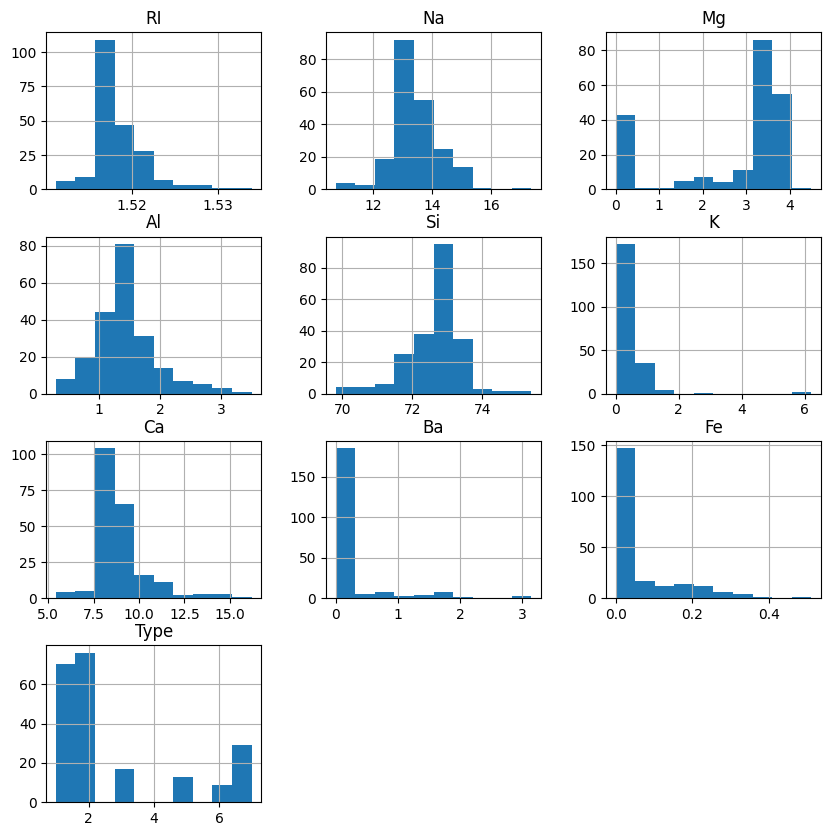

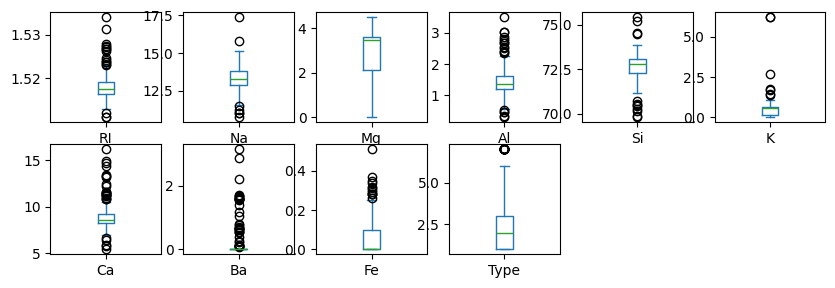

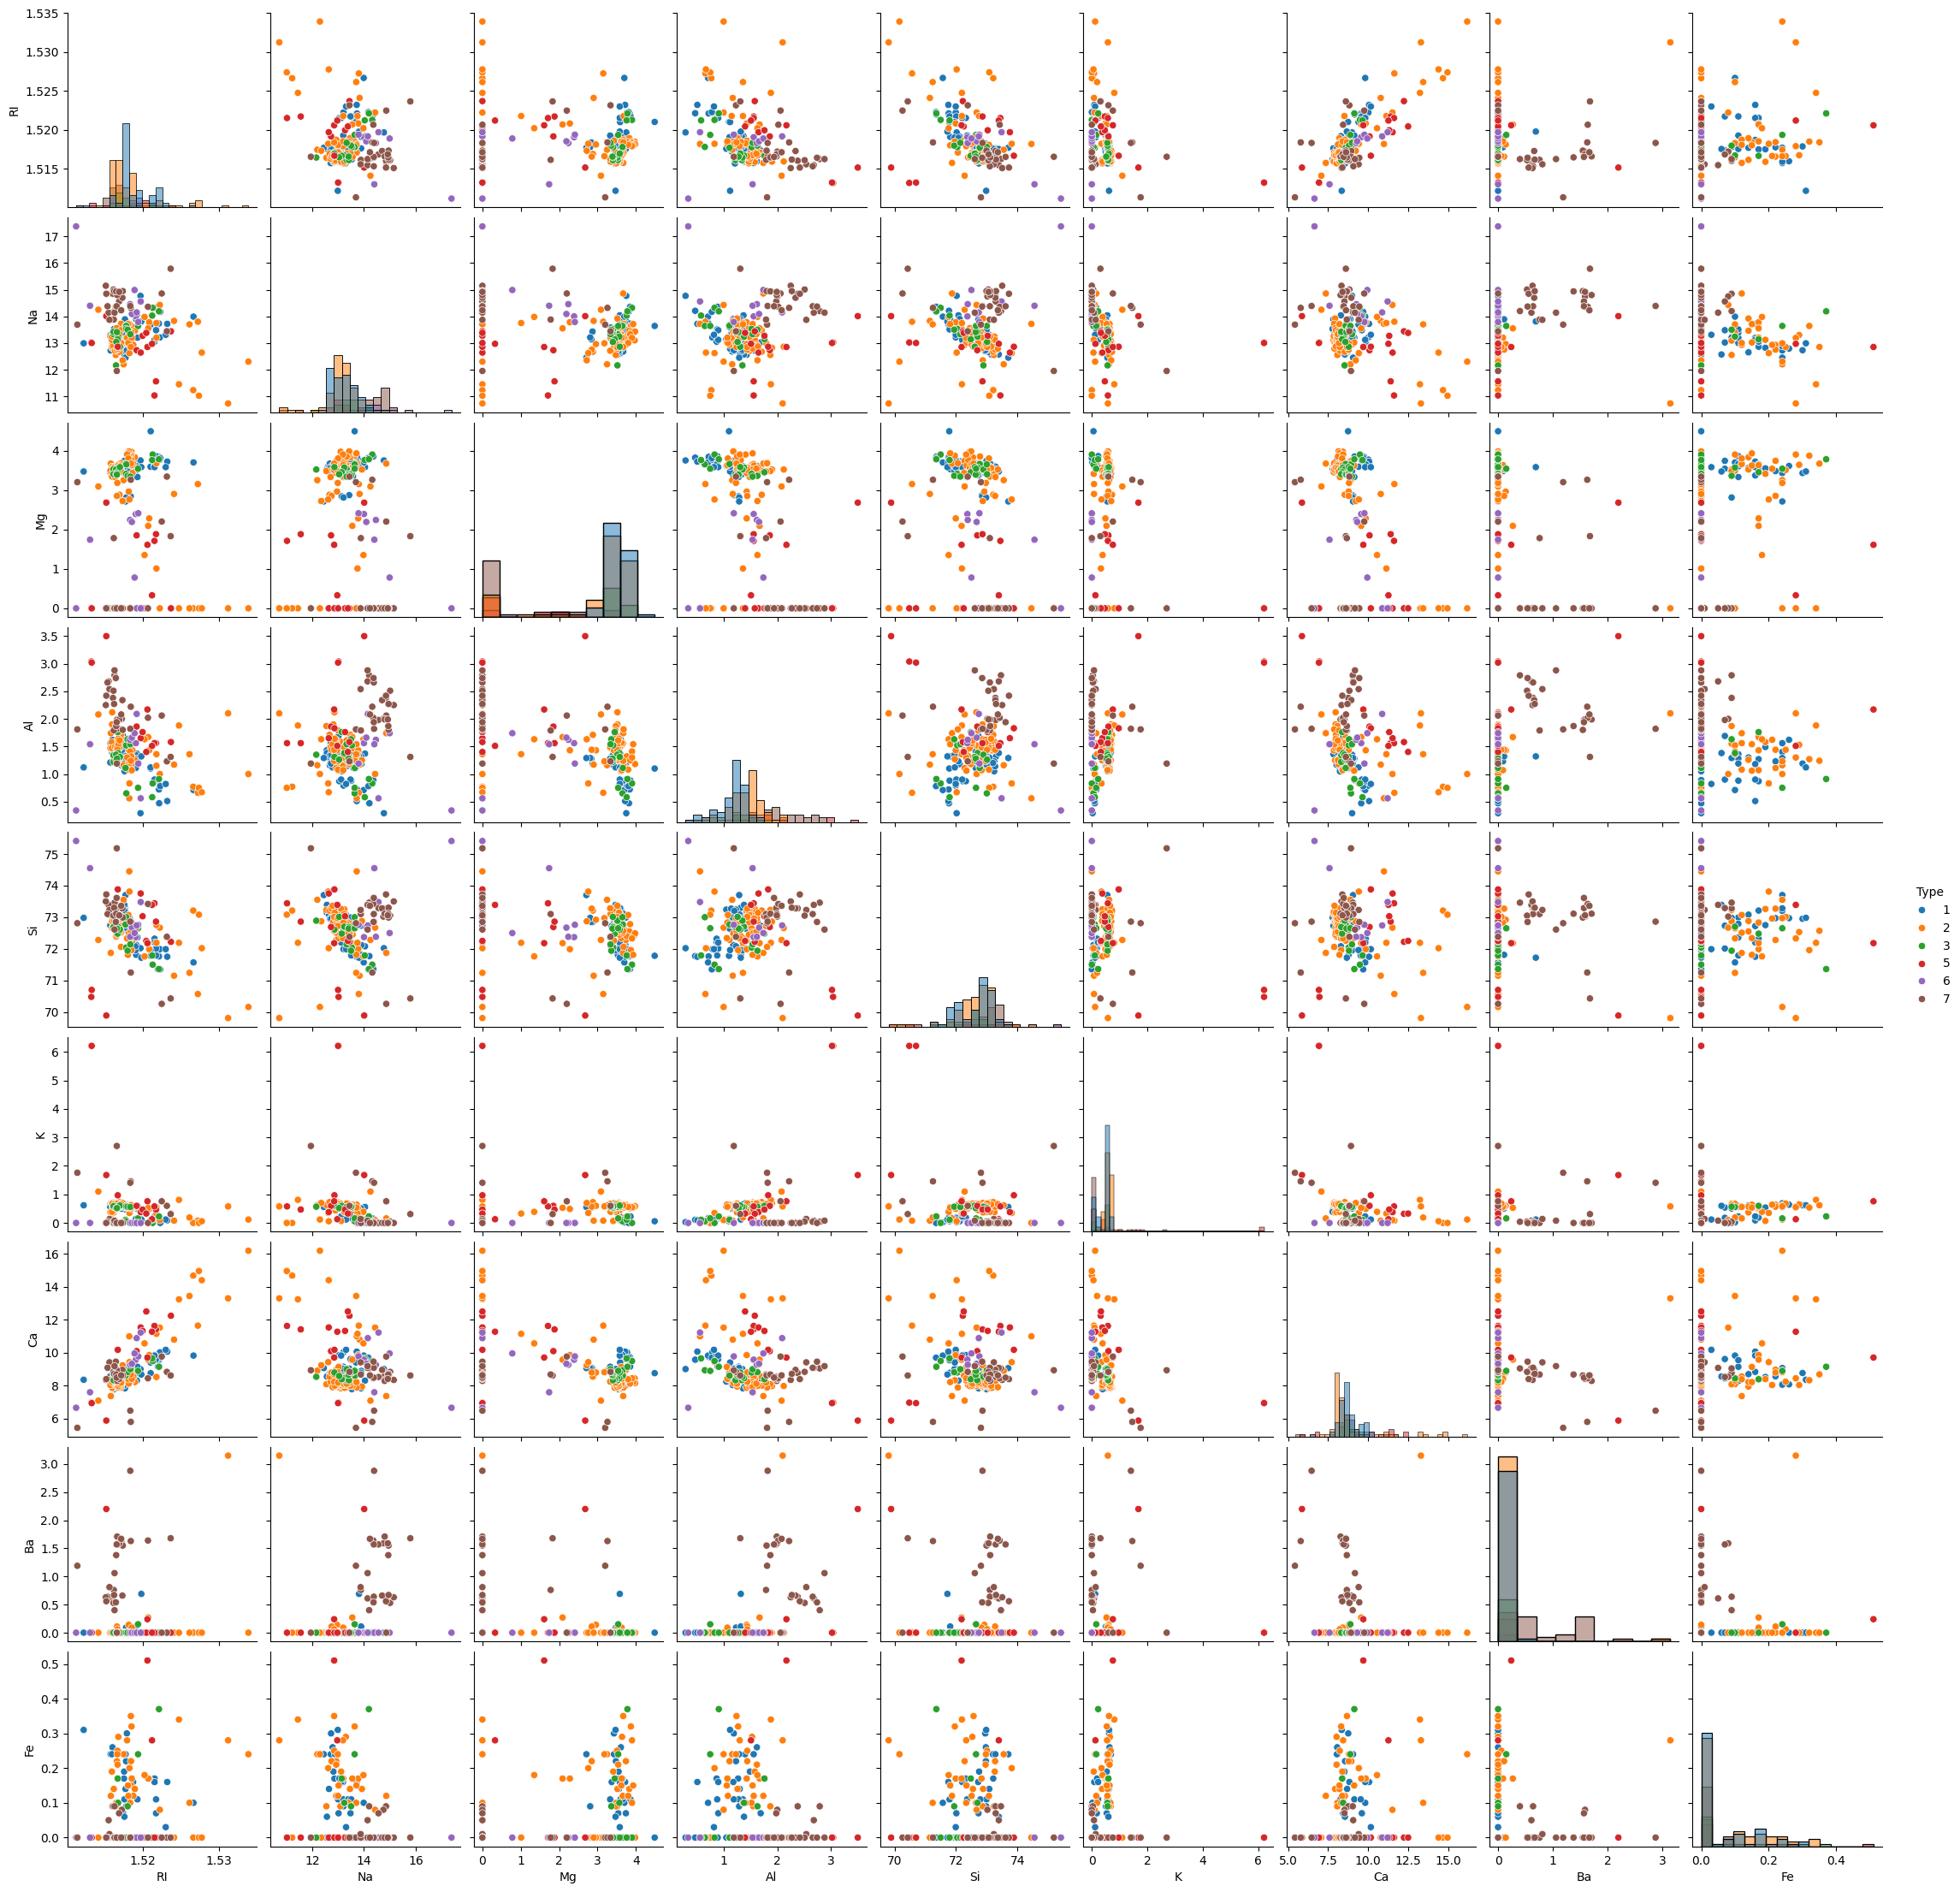

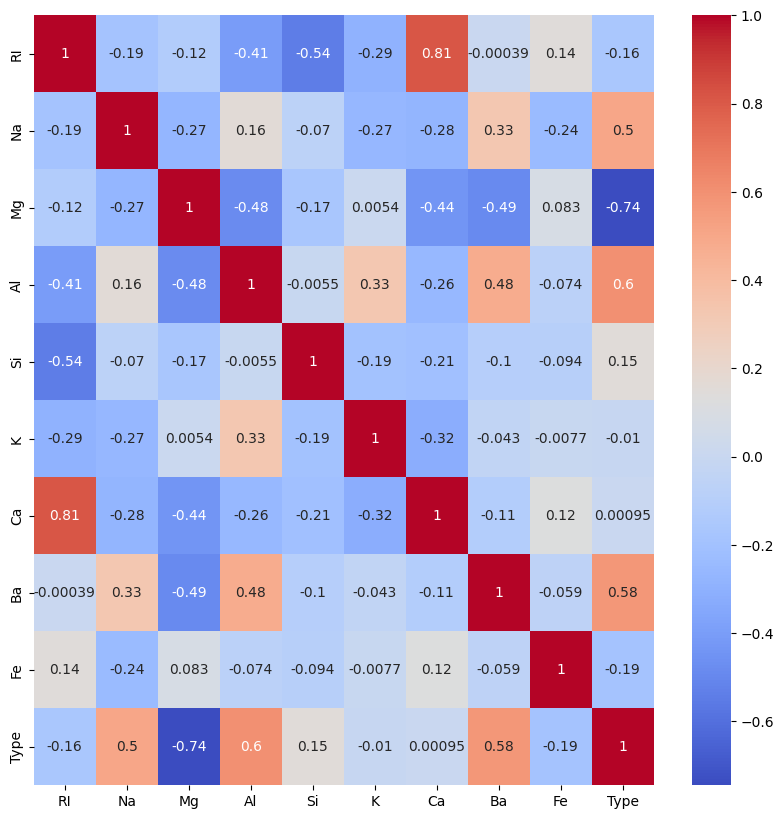

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#histogram
df.hist(figsize=(10,10))
plt.show()

#boxplot
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(10,10))
plt.show()

#pair plot
sns.pairplot(df,hue='Type', diag_kind='hist', palette='tab10')
plt.show()

#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Observations:

Varying Features (Mg, Ba): Features that vary significantly between types are strong predictors and will be highly important for your classifiers.

Correlations (Al, Mg): Strong correlation indicates multicollinearity, meaning these features provide similar information. This is generally not a problem for Random Forest but explains potential redundancy.

# 3: Data Preprocessing

In [12]:
print(df.isnull().sum()) #for missing values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


There are no missing values and All features are numeric; no categorical encoding needed.

In [13]:
#feature scaling:
from sklearn.preprocessing import StandardScaler
X = df.drop('Type', axis=1)
y = df['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The resulting X_scaled array will have a mean of 0 and a standard deviation of 1 for all features. This is crucial for normalizing the influence of features with different initial scales (like Mg and Ba, as noted in the earlier observations).

In [14]:
# Handling the imbalance data:
from sklearn.preprocessing import StandardScaler #for feature scaling
from imblearn.over_sampling import SMOTE #It's used to address class imbalance by creating synthetic samples for the minority class
from collections import Counter #it is used to count the hashable objects in an iterable

# Feature and target
X = df.drop("Type", axis=1)
y = df["Type"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check class distribution after balancing
print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
After SMOTE: Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


In [20]:
#Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_resampled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [-0.72451755, -0.91553393, -1.86551055, ...,  0.10637241,
         0.25262473, -0.5483051 ],
       [-0.42593408,  1.83194779, -1.86551055, ..., -0.32133902,
         2.8785826 , -0.5864509 ],
       [-0.39853528,  1.54067499, -1.86551055, ..., -0.90267718,
         3.88227023, -0.5864509 ]])

In [18]:
y_resampled

,Type
0,1
1,1
2,1
3,1
4,1
...,...
451,7
452,7
453,7
454,7


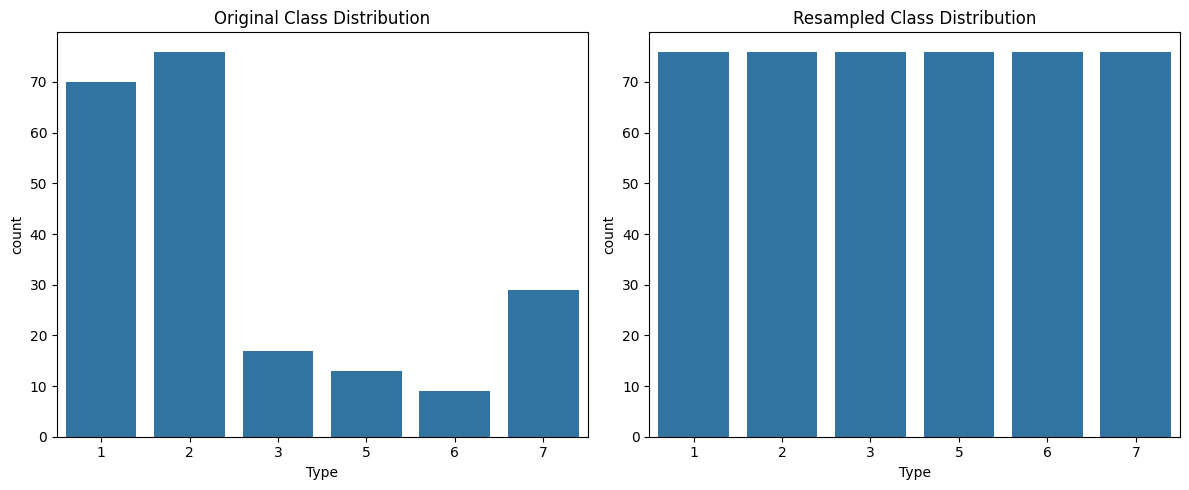

In [21]:
#Visualize before & after class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Original Class Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("Resampled Class Distribution")

plt.tight_layout()
plt.show()

# 4. Random Forest Model Implementation:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
#stratify=y_resampled  ensures that the proportion of classes in the og dataset

In [23]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



# 5. Bagging and Boosting Methods:

In [24]:
#Bagging Classifier
bag = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("\nBagging Classifier Report:")
print(classification_report(y_test, y_pred_bag))


Bagging Classifier Report:
              precision    recall  f1-score   support

           1       0.68      0.87      0.76        15
           2       0.93      0.87      0.90        15
           3       0.92      0.73      0.81        15
           5       0.94      1.00      0.97        16
           6       1.00      1.00      1.00        16
           7       1.00      0.93      0.97        15

    accuracy                           0.90        92
   macro avg       0.91      0.90      0.90        92
weighted avg       0.91      0.90      0.90        92



In [25]:
#Boosting Classifier
boost = AdaBoostClassifier(n_estimators=100, random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

print("\nBoosting (AdaBoost) Classifier Report:")
print(classification_report(y_test, y_pred_boost))


Boosting (AdaBoost) Classifier Report:
              precision    recall  f1-score   support

           1       0.39      0.60      0.47        15
           2       0.25      0.20      0.22        15
           3       0.47      0.47      0.47        15
           5       0.75      0.38      0.50        16
           6       0.67      1.00      0.80        16
           7       0.60      0.40      0.48        15

    accuracy                           0.51        92
   macro avg       0.52      0.51      0.49        92
weighted avg       0.52      0.51      0.49        92



# Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregation) and Boosting are the two primary categories of ensemble learning methods used to combine multiple models (often decision trees) into a single, more powerful predictor. They primarily differ in how they train the base models and aggregate the results.

Bagging is a parallel method where all base models are trained independently. It works by training each model on a random subset of the training data (a bootstrap sample, with replacement). The final prediction is determined by averaging the outputs (for regression) or by taking a majority vote (for classification). The main goal of Bagging is to reduce the variance of unstable models like complex decision trees, thereby preventing overfitting. Random Forest is the most famous example of a bagging algorithm, adding an extra layer of randomness by limiting the features available at each split.


Boosting is a sequential method where base models are trained iteratively and dependently. It starts by training a simple, weak model, and then each subsequent model is built to focus specifically on the samples that the previous models misclassified or handled poorly (by increasing the weight of those difficult samples). The final prediction is a weighted sum of all the weak models, giving higher influence to those that performed better. The primary goal of Boosting is to reduce the bias of the overall model, effectively converting a collection of many weak learners into a single strong learner. AdaBoost and Gradient Boosting (GBM) are common examples.


2. Explain how to handle imbalance in the data.

An imbalanced dataset occurs when the number of observations in one class (the majority class) significantly outweighs the number of observations in another class (the minority class). This imbalance can severely bias a model, causing it to ignore or perform poorly on the minority class.

There are three main strategies to handle data imbalance:
1. Sampling Techniques: These methods modify the training set to balance the class distribution. Oversampling(like SMOTE) creates synthetic samples for the minority class to increase its representation. Undersamplingremoves samples from the majority class. Oversampling, particularly SMOTE, is often preferred as it avoids throwing away valuable information.
2. Algorithm Level Adjustments: This involves modifying the learning algorithm itself. Many models (like Logistic Regression and Ensemble Methods) allow for setting class weights. This tells the model to penalize errors on the minority class more severely than errors on the majority class

3. Evaluation Metrics: Since accuracy is misleading on imbalanced data (a model predicting the majority class all the time can still show high accuracy), it's crucial to use metrics that focus on the minority class performance, such as Precision, Recall (Sensitivity), F1-Score, and the Area Under the ROC Curve (AUC).
